In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data are on the gitlab at https://gitlab.inria.fr/ml_genetics/private/robustness_pipeline/-/tree/master/data

In [2]:
#data with damage parameters (27 combinations on 100 scenarios with 10 replicates)
df = pd.read_csv('../data/networkFullResult.csv', sep=",", header=0)

#remove rows containing missing values
df = df[df['observed_class'] != -1]

In [3]:
#no damaged data
dforiginal = pd.read_csv('../data/base100originalResult.csv', sep=",", header=0)

In [4]:
def averageGargaSnp(grp):
    return grp.nbSNP_garga.mean()
dfAverageSnp= df.groupby(["damage","coverage","error_rate"]).apply(averageGargaSnp).to_frame("averageGargaSnp").reset_index()

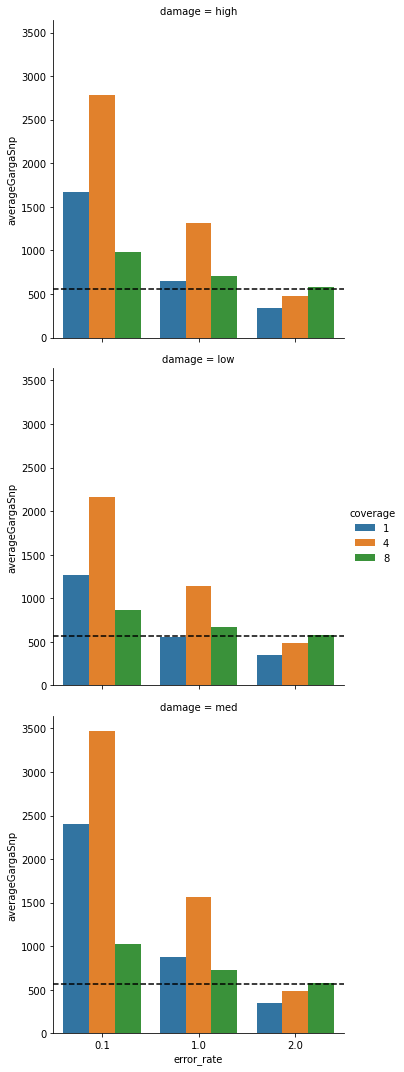

In [6]:
chart = sns.catplot(data=dfAverageSnp, y="averageGargaSnp", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)

chart.axes[0][0].axhline(y=df.nb_SNPsimu.mean(), ls='--', c='black')
chart.axes[1][0].axhline(y=df.nb_SNPsimu.mean(), ls='--', c='black')
chart.axes[2][0].axhline(y=df.nb_SNPsimu.mean(), ls='--', c='black')

#plt.savefig('/home/mathieu/Bureau/averageGargaSNP.png', transparent=False)

The number of SNP in the post gargammel depends on damage

In [7]:
def avgSoftmax(grp):
    return grp.softmax_for_observed_class.mean()

In [8]:
avgSoftmax(dforiginal)

0.6622464842250719

In [9]:
dfAverageSoftmax = df.groupby(["damage","coverage","error_rate"]).apply(avgSoftmax).to_frame("avgSoftmax").reset_index()

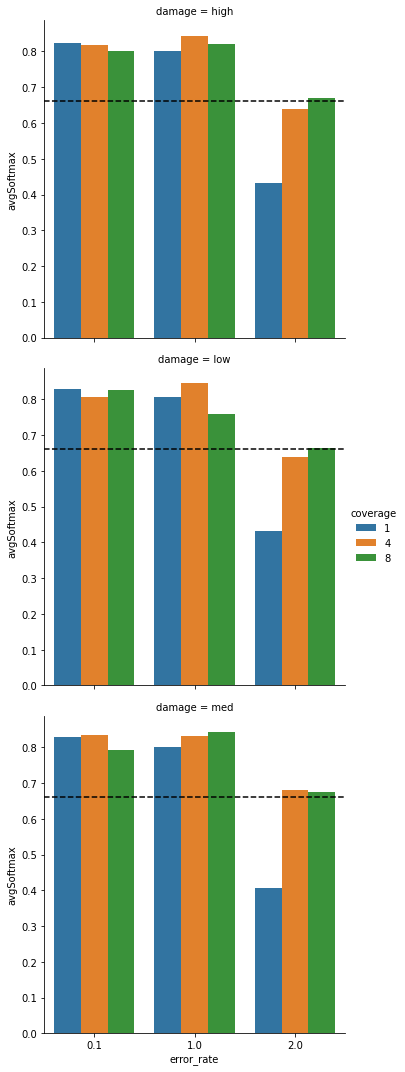

In [11]:
#average softmax in function of paramters set
chart = sns.catplot(data=dfAverageSoftmax, y="avgSoftmax", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)
chart.axes[0][0].axhline(y=avgSoftmax(dforiginal), ls='--', c='black')
chart.axes[1][0].axhline(y=avgSoftmax(dforiginal), ls='--', c='black')
chart.axes[2][0].axhline(y=avgSoftmax(dforiginal), ls='--', c='black')
#plt.savefig('/home/mathieu/Bureau/avgSmax.png', transparent=False)

Text(0, 0.5, 'average Softmax')

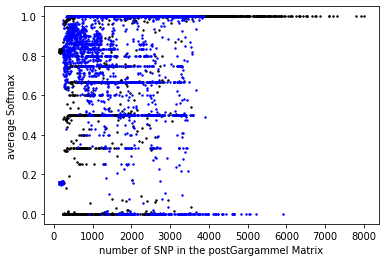

In [14]:
#avg softmax in fucntion of Snp number

dfzero = df[df['expected_class'] == 0]
dfone = df[df['expected_class'] == 1]

dzero = dfzero.groupby(["nbSNP_garga"]).apply(avgSoftmax).to_frame("avgSoftmax").reset_index()
done = dfone.groupby(["nbSNP_garga"]).apply(avgSoftmax).to_frame("avgSoftmax").reset_index()

plt.scatter(dzero.nbSNP_garga, dzero.avgSoftmax, color = 'black',s = 2,label="exp=0")
plt.scatter(done.nbSNP_garga, done.avgSoftmax, color = 'blue',s = 2,label="exp=1")

plt.xlabel('number of SNP in the postGargammel Matrix')
plt.ylabel('average Softmax')
#plt.savefig('/home/mathieu/Bureau/avgSmaxSnp.png', transparent=False)

Text(0, 0.5, 'average Softmax')

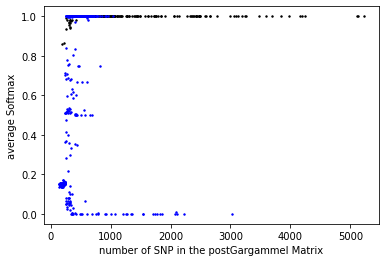

In [16]:
#Same for non damaged data

dfzero = dforiginal[dforiginal['expected_class'] == 0]
dfone = dforiginal[dforiginal['expected_class'] == 1]

dzero = dfzero.groupby(["nb_SNP"]).apply(avgSoftmax).to_frame("avgSoftmax").reset_index()
done = dfone.groupby(["nb_SNP"]).apply(avgSoftmax).to_frame("avgSoftmax").reset_index()

plt.scatter(dzero.nb_SNP, dzero.avgSoftmax, color = 'black',s = 2,label="exp=0")
plt.scatter(done.nb_SNP, done.avgSoftmax, color = 'blue',s = 2,label="exp=1")

plt.xlabel('number of SNP in the postGargammel Matrix')
plt.ylabel('average Softmax')
#plt.savefig('/home/mathieu/Bureau/avgSmaxOriginalSnp.png', transparent=False)

Compute sensitivity, specificity and precision

In [17]:
def sensitivity(grp):
    return sum((grp.expected_class == 1) & (grp.observed_class==1)) / (sum((grp.expected_class == 1) & (grp.observed_class==1)) + sum((grp.expected_class == 1) & (grp.observed_class==0))) 

In [18]:
def specificity(grp):
    return sum((grp.expected_class == 0) & (grp.observed_class==0)) / (sum((grp.expected_class == 0) & (grp.observed_class==0)) + sum((grp.expected_class == 0) & (grp.observed_class==1))) 

In [19]:
def precision(grp):
    return sum((grp.expected_class == 1) & (grp.observed_class==1)) / (sum((grp.expected_class == 1) & (grp.observed_class==1)) + sum((grp.expected_class == 0) & (grp.observed_class==1)))

In [20]:
df_sens = df.groupby(["damage", "error_rate", "coverage"]).apply(sensitivity).to_frame("sensitivity").reset_index()

In [21]:
df_spe = df.groupby(["damage", "error_rate", "coverage"]).apply(specificity).to_frame("specificity").reset_index()

In [22]:
df_prec = df.groupby(["damage", "error_rate", "coverage"]).apply(precision).to_frame("precision").reset_index()

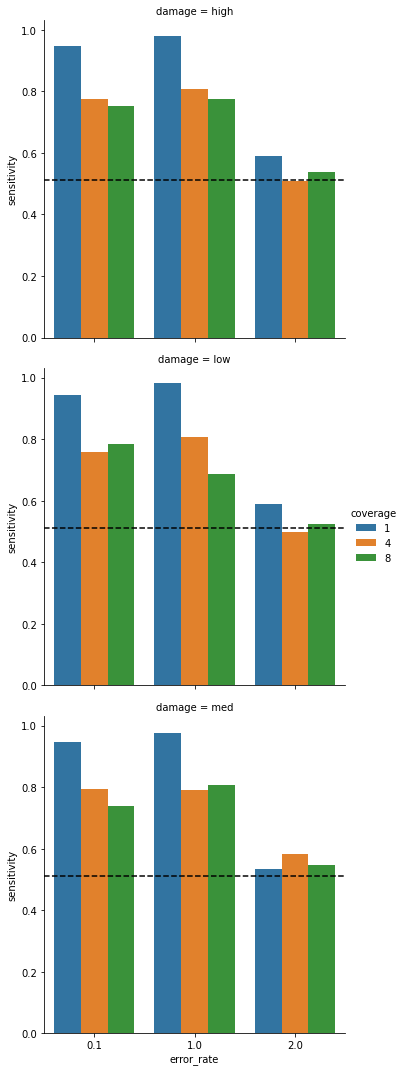

In [23]:
chart = sns.catplot(data=df_sens, y="sensitivity", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)

chart.axes[0][0].axhline(y=sensitivity(dforiginal), ls='--', c='black')
chart.axes[1][0].axhline(y=sensitivity(dforiginal), ls='--', c='black')
chart.axes[2][0].axhline(y=sensitivity(dforiginal), ls='--', c='black')

#plt.savefig('/home/mathieu/Bureau/sensitivity.png', transparent=False)

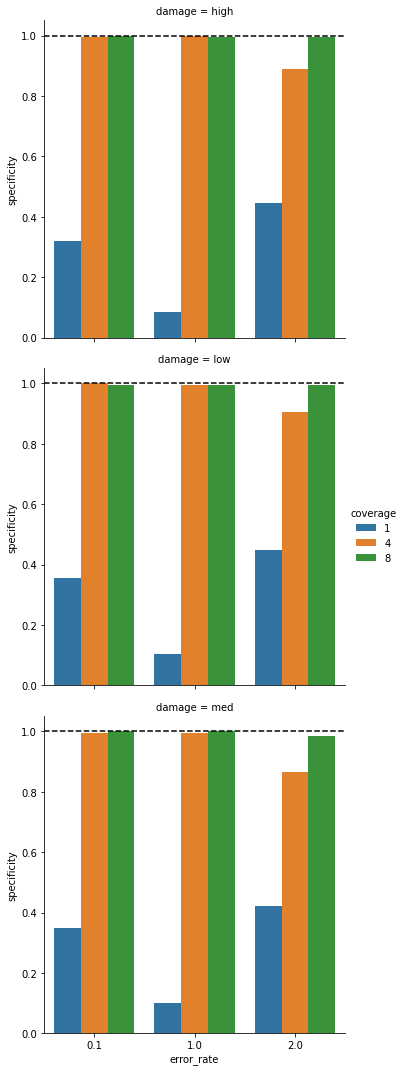

In [24]:
chart = sns.catplot(data=df_spe, y="specificity", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)

chart.axes[0][0].axhline(y=specificity(dforiginal), ls='--', c='black')
chart.axes[1][0].axhline(y=specificity(dforiginal), ls='--', c='black')
chart.axes[2][0].axhline(y=specificity(dforiginal), ls='--', c='black')
#plt.savefig('//home/mathieu/Bureau/specificity.png', transparent=False)

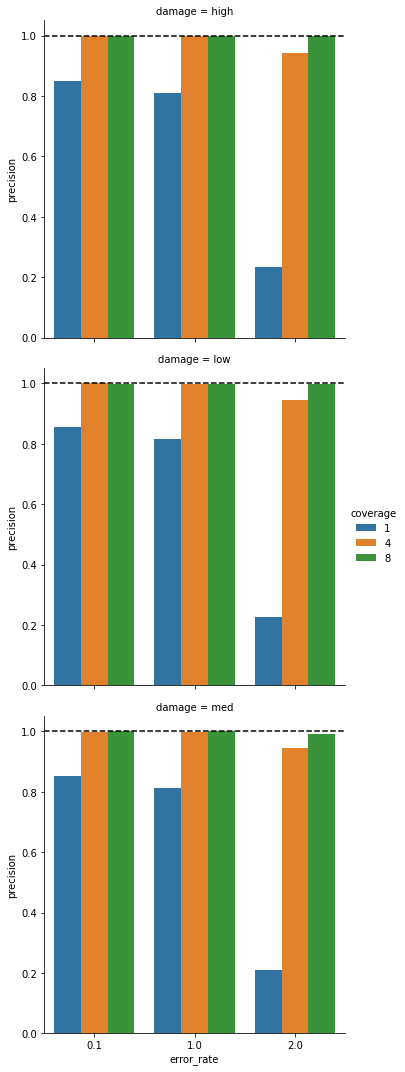

In [25]:
chart = sns.catplot(data=df_prec, y="precision", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)

chart.axes[0][0].axhline(y=precision(dforiginal), ls='--', c='black')
chart.axes[1][0].axhline(y=precision(dforiginal), ls='--', c='black')
chart.axes[2][0].axhline(y=precision(dforiginal), ls='--', c='black')
#plt.savefig('/home/mathieu/Bureau/precision.png', transparent=False)

In [27]:
#Missing value 
def countmis(grp):
    return sum((grp.observed_class == -1) / dforiginal.shape[0])

In [28]:
df = pd.read_csv('/home/mathieu/Bureau/networkFullResult.csv', sep=",", header=0)
df_mis = df.groupby(["damage", "error_rate", "coverage"]).apply(countmis).to_frame("percentage_of_missing_value").reset_index()

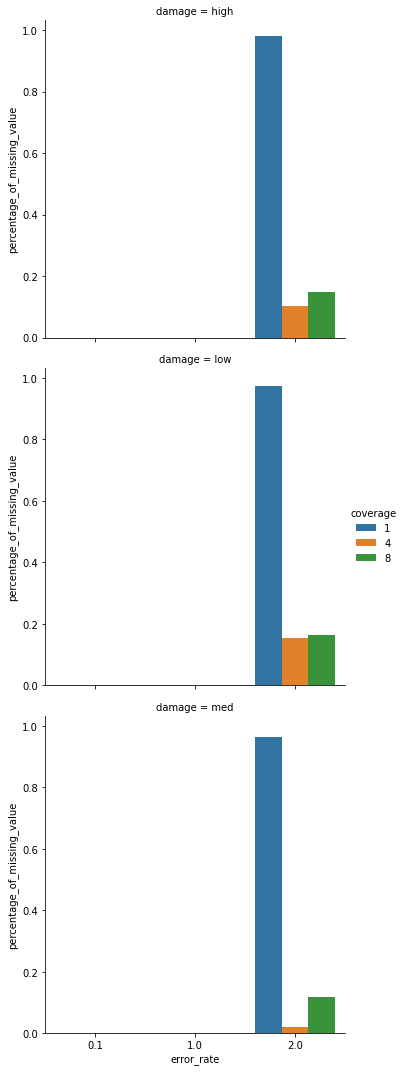

In [29]:
sns.catplot(data=df_mis, y="percentage_of_missing_value", x="error_rate", hue="coverage", row="damage", kind="bar", legend_out=True)